### Student Information
Name: ÂäâÊôâÁùø

Student ID: 11128129

GitHub ID: 33049242

Kaggle name: ariel1620

Kaggle private scoreboard snapshot: 
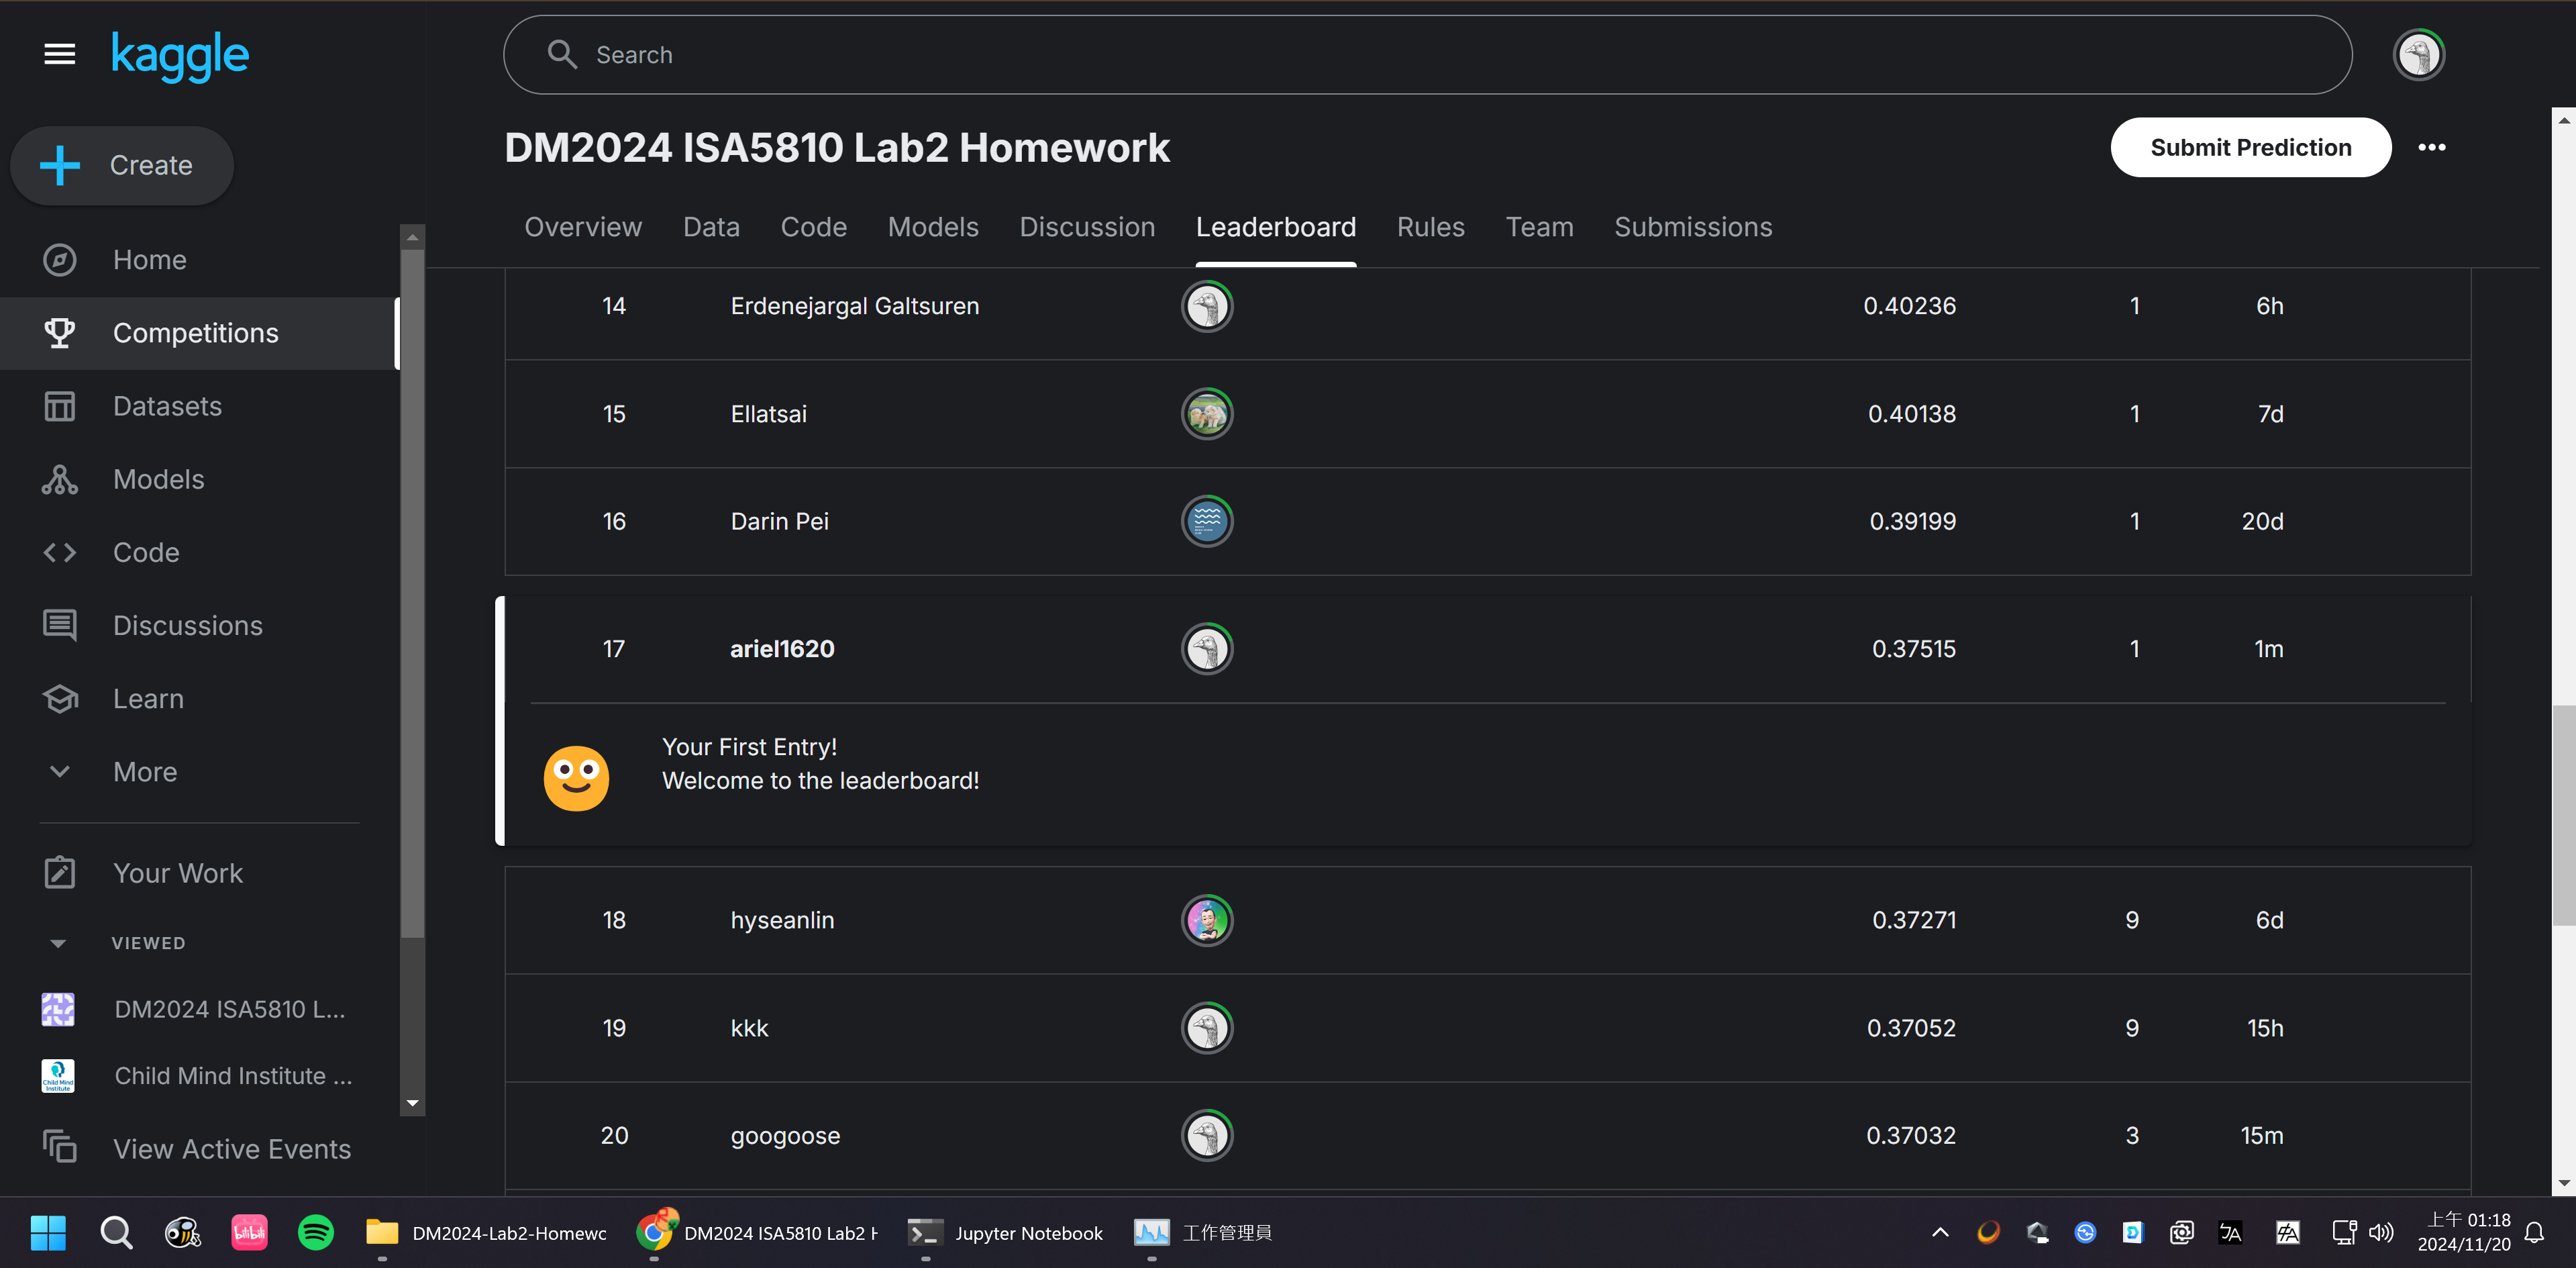

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__. 

# 1.Á´∂Ë≥Ω

In [1]:
### Begin Assignment Here
import pandas as pd
import json
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

---
## ËÆÄÂèñÊ™îÊ°à

In [2]:
# ËÆÄÂèñ tweets_DM.json
tweets = []
with open('HW_compt/tweets_DM.json', 'r', encoding='utf-8') as file:
    for line in file:
        record = json.loads(line)
        tweet = record['_source']['tweet']
        tweets.append({
            'tweet_id': tweet['tweet_id'],
            'text': tweet['text']
        })
tweets_df = pd.DataFrame(tweets)

# ËÆÄÂèñ emotion.csv
emotion_df = pd.read_csv('HW_compt/emotion.csv', names=['tweet_id', 'emotion'])

# ËÆÄÂèñ data_identification.csv
data_id_df = pd.read_csv('HW_compt/data_identification.csv', names=['tweet_id', 'set'])

# ËÆÄÂèñ sampleSubmission.csv
submission_format = pd.read_csv('HW_compt/sampleSubmission.csv')

---
## Ë≥áÊñôÂêà‰ΩµËàáÊ∏ÖÁêÜ

In [3]:
# Âêà‰Ωµ tweets Âíå data_identification
data = pd.merge(tweets_df, data_id_df, on='tweet_id', how='left')

# ÂÜçÂêà‰Ωµ emotion Ë≥áÊñôÔºåÂÉÖÈôêË®ìÁ∑¥ÈõÜÊúâÊÉÖÁ∑íÊ®ôÁ±§
data = pd.merge(data, emotion_df, on='tweet_id', how='left')

# Ê™¢Êü•Ë≥áÊñôÁµêÊßã
data.head()

tweet_id                                               text    set  \
0  0x376b20  People who post "add me on #Snapchat" must be ...  train   
1  0x2d5350  @brianklaas As we see, Trump is dangerous to #...  train   
2  0x28b412  Confident of your obedience, I write to you, k...   test   
3  0x1cd5b0                Now ISSA is stalking Tasha üòÇüòÇüòÇ <LH>  train   
4  0x2de201  "Trust is not the same as faith. A friend is s...   test   

        emotion  
0  anticipation  
1       sadness  
2           NaN  
3          fear  
4           NaN

In [4]:
# Ê™¢Êü• tweet_id ÁöÑÂîØ‰∏ÄÊÄß
print(f"tweets_DM.json ‰∏≠ÁöÑ tweet_id ÂîØ‰∏ÄÂÄºÊï∏Èáè: {tweets_df['tweet_id'].nunique()}")
print(f"emotion.csv ‰∏≠ÁöÑ tweet_id ÂîØ‰∏ÄÂÄºÊï∏Èáè: {emotion_df['tweet_id'].nunique()}")

# Ê™¢Êü• emotion.csv ÁöÑ tweet_id ÊòØÂê¶Â≠òÂú®Êñº tweets_DM.json ‰∏≠
missing_ids = emotion_df[~emotion_df['tweet_id'].isin(tweets_df['tweet_id'])]
print(f"emotion.csv ‰∏≠ÁÑ°Ê≥ïÂåπÈÖçÂà∞ÁöÑ tweet_id Êï∏Èáè: {len(missing_ids)}")

# Âêà‰ΩµÊ™¢Êü•
merged_data = pd.merge(tweets_df, emotion_df, on='tweet_id', how='left')
missing_labels = merged_data['emotion'].isnull().sum()
print(f"Âêà‰ΩµÂæåÁº∫Â§±ÊÉÖÁ∑íÊ®ôÁ±§ÁöÑÊé®ÊñáÊï∏Èáè: {missing_labels}")

tweets_DM.json ‰∏≠ÁöÑ tweet_id ÂîØ‰∏ÄÂÄºÊï∏Èáè: 1867535
emotion.csv ‰∏≠ÁöÑ tweet_id ÂîØ‰∏ÄÂÄºÊï∏Èáè: 1455564
emotion.csv ‰∏≠ÁÑ°Ê≥ïÂåπÈÖçÂà∞ÁöÑ tweet_id Êï∏Èáè: 1
Âêà‰ΩµÂæåÁº∫Â§±ÊÉÖÁ∑íÊ®ôÁ±§ÁöÑÊé®ÊñáÊï∏Èáè: 411972


---
## Êï∏ÊìöÊ∏ÖÁêÜ

In [5]:
import re

# Ê∏ÖÁêÜÊé®ÊñáÊñáÂ≠ó
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # ÁßªÈô§Á∂≤ÂùÄ
    text = re.sub(r'<LH>', '', text)  # ÁßªÈô§ <LH>
    text = re.sub(r'[^\w\s]', '', text)  # ÁßªÈô§Ê®ôÈªûÁ¨¶Ëôü
    return text.lower()  # ËΩâÁÇ∫Â∞èÂØ´

data['cleaned_text'] = data['text'].apply(clean_text)

In [6]:
data

tweet_id                                               text    set  \
0        0x376b20  People who post "add me on #Snapchat" must be ...  train   
1        0x2d5350  @brianklaas As we see, Trump is dangerous to #...  train   
2        0x28b412  Confident of your obedience, I write to you, k...   test   
3        0x1cd5b0                Now ISSA is stalking Tasha üòÇüòÇüòÇ <LH>  train   
4        0x2de201  "Trust is not the same as faith. A friend is s...   test   
...           ...                                                ...    ...   
1867530  0x316b80  When you buy the last 2 tickets remaining for ...   test   
1867531  0x29d0cb  I swear all this hard work gone pay off one da...   test   
1867532  0x2a6a4f  @Parcel2Go no card left when I wasn't in so I ...   test   
1867533  0x24faed  Ah, corporate life, where you can date <LH> us...  train   
1867534  0x34be8c             Blessed to be living #Sundayvibes <LH>  train   

              emotion                                       cleaned_text  
0        anticipation  people who post add me on snapchat must be deh...  
1             sadness  brianklaas as we see trump is dangerous to fre...  
2                 NaN  confident of your obedience i write to you kno...  
3                fear                       now issa is stalking tasha    
4                 NaN  trust is not the same as faith a friend is som...  
...               ...                                                ...  
1867530           NaN  when you buy the last 2 tickets remaining for ...  
1867531           NaN   i swear all this hard work gone pay off one day   
1867532           NaN  parcel2go no card left when i wasnt in so i ha...  
1867533           joy  ah corporate life where you can date  using ju...  
1867534           joy                  blessed to be living sundayvibes   

[1867535 rows x 5 columns]

---
## Feature Engineering

In [7]:
# Â∞áË≥áÊñôÂàÜÁÇ∫Ë®ìÁ∑¥ËàáÊ∏¨Ë©¶ÈõÜ
train_data = data[data['set'] == 'train']
test_data = data[data['set'] == 'test']

# ÊñáÊú¨ËΩâÊï∏ÂÄºÁâπÂæµ
vectorizer = CountVectorizer(max_features=4000)
X_train = vectorizer.fit_transform(train_data['cleaned_text'])
X_test = vectorizer.transform(test_data['cleaned_text'])

# Ë®ìÁ∑¥ÈõÜÊ®ôÁ±§
y_train = train_data['emotion']

---
## Model Training

In [8]:
# Ë®ìÁ∑¥Ê®°Âûã
model = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=77)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=77)

---
## Predicting and Result

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# È†êÊ∏¨Ë®ìÁ∑¥ÈõÜ/È©óË≠âÈõÜÔºàÂÉÖÂ∞çÊúâÊ®ôÁ±§ÁöÑÊï∏ÊìöÔºâ
y_train_pred = model.predict(X_train)

# Ê®°ÂûãÊÄßËÉΩË©ï‰º∞ - ÂàÜÈ°ûÂ†±Âëä
print("Classification Report:")
print(classification_report(y_train, y_train_pred))

# Ê∑∑Ê∑ÜÁü©Èô£ÂèØË¶ñÂåñ
conf_matrix = confusion_matrix(y_train, y_train_pred, labels=encoder.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Classification Report:
              precision    recall  f1-score   support

       anger       0.99      0.97      0.98     39867
anticipation       0.98      0.97      0.98    248935
     disgust       0.99      0.97      0.98    139101
        fear       0.98      0.95      0.96     63999
         joy       0.95      0.99      0.97    516017
     sadness       0.98      0.97      0.98    193437
    surprise       0.99      0.95      0.97     48729
       trust       0.98      0.95      0.97    205478

    accuracy                           0.97   1455563
   macro avg       0.98      0.97      0.97   1455563
weighted avg       0.97      0.97      0.97   1455563



NameError: name 'encoder' is not defined

In [13]:
# ÂâµÂª∫ test_data ÂâØÊú¨
test_data_copy = test_data.copy()

# Ê∏¨Ë©¶ÈõÜÈ†êÊ∏¨
test_data_copy['emotion'] = model.predict(X_test)

# Ê†ºÂºèÂåñÊèê‰∫§ÁµêÊûú
submission = test_data_copy[['tweet_id', 'emotion']].copy()

# ‰øÆÊîπÂàóÂêç tweet_id -> id
submission.rename(columns={'tweet_id': 'id'}, inplace=True)

# Ëº∏Âá∫ÁÇ∫ submission.csv
submission.to_csv('submission.csv', index=False)


---
# 2.‰ΩúÊ•≠ (Master Lab)

Load data

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

id                                               text emotion  intensity
0  10000  How the fu*k! Who the heck! moved my fridge!.....   anger      0.938
1  10001  So my Indian Uber driver just called someone t...   anger      0.896
2  10002  @DPD_UK I asked for my parcel to be delivered ...   anger      0.896
3  10003  so ef whichever butt wipe pulled the fire alar...   anger      0.896
4  10004  Don't join @BTCare they put the phone down on ...   anger      0.896

---
### Exercise 1 (Take home):

In [10]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ArieL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ArieL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ArieL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


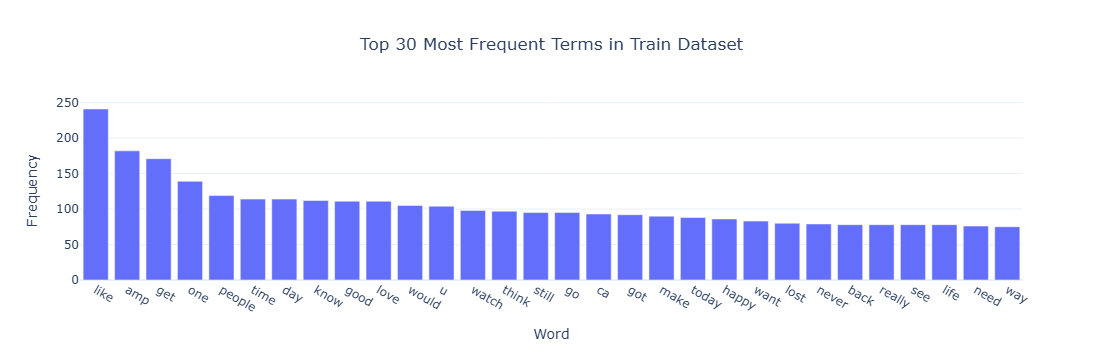

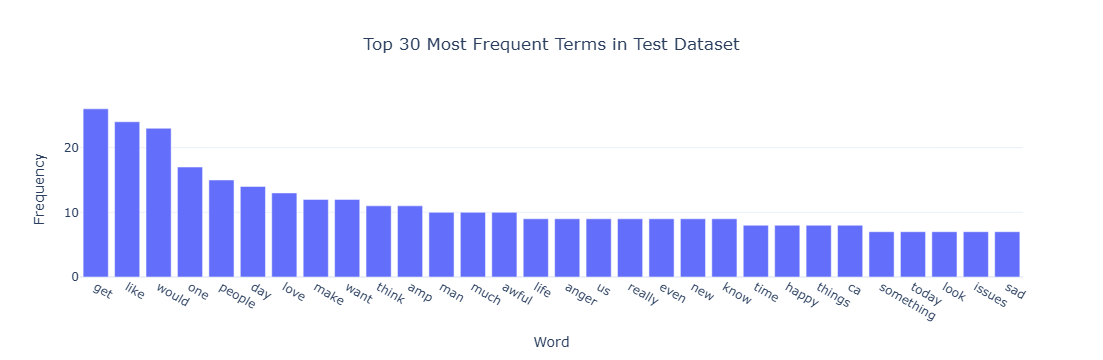

In [11]:
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import plotly.express as px

# Download stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Function to clean and tokenize text, and remove stopwords
def preprocess_text_from_df(df, text_column):
    data = df[text_column].tolist()
    stop_words = set(stopwords.words('english'))
    tokens = []
    for text in data:
        words = word_tokenize(text.lower())  # Tokenize and lowercase
        words = [word for word in words if word.isalnum()]  # Remove punctuation
        # Relaxing stopword removal
        words = [word for word in words if word not in stop_words]  
        tokens.extend(words)
    return tokens

# Get word frequency for top 30 words in a dataset
def get_top_words(df, text_column, top_n=30):
    tokens = preprocess_text_from_df(df, text_column)
    word_counts = Counter(tokens)
    if len(word_counts) < top_n:
        top_n = len(word_counts)  # Adjust if there are fewer unique words than requested
    top_words = word_counts.most_common(top_n)
    return pd.DataFrame(top_words, columns=['Word', 'Frequency'])

# Get top 30 words in train and test datasets
train_top_words = get_top_words(train_df, 'text')
test_top_words = get_top_words(test_df, 'text')

# Plotting with Plotly for Train dataset
fig_train = px.bar(train_top_words, x='Word', y='Frequency', 
                   title="Top 30 Most Frequent Terms in Train Dataset")
fig_train.update_layout(yaxis_title="Frequency", xaxis_title="Word", 
                        title_x=0.5, template="plotly_white")

# Plotting with Plotly for Test dataset
fig_test = px.bar(test_top_words, x='Word', y='Frequency', 
                  title="Top 30 Most Frequent Terms in Test Dataset")
fig_test.update_layout(yaxis_title="Frequency", xaxis_title="Word", 
                       title_x=0.5, template="plotly_white")

# Show the plots
fig_train.show()
fig_test.show()


---
### Exercise 2 (Take home):

In [12]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

BOW_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_1000.fit(train_df['text'])

train_data_TFIDF_features_1000 = BOW_1000.transform(train_df['text'])

feature_names_1000 = BOW_1000.get_feature_names_out()
feature_names_1000[100:110]

C:\Users\ArieL\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
### Exercise 3 (Take home):

#### Accuracy on Individual Classes

- The model performs best on **fear**, with 76 correct predictions.
- **Joy** and **anger** are also recognized fairly well, with 56 and 57 correct predictions, respectively.
- **Sadness** has a lower accuracy, with only 47 correct predictions.

#### Misclassification Patterns

- **Fear** is often misclassified as **anger** (16 times) and to a lesser extent as **joy** and **sadness**.
- **Anger** is sometimes misclassified as **fear** (18 times).
- **Joy** has relatively fewer misclassifications, though there are some errors, primarily as **fear** and **sadness**.
- **Sadness** is most frequently confused with **fear** (13 times), suggesting that sadness and fear might have similar features in the dataset.


---
### Exercise 4 (Take home):

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [19]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [20]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

In [21]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

In [22]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Naive Bayes model
NB_model = MultinomialNB()

# Train the Naive Bayes model
NB_model.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred_nb = NB_model.predict(X_train)
y_test_pred_nb = NB_model.predict(X_test)

# Evaluate the results on the test data
print("Naive Bayes Testing Accuracy:", accuracy_score(y_test, y_test_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred_nb))

Naive Bayes Testing Accuracy: 0.6974063400576369

Classification Report:
               precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347


Confusion Matrix:
 [[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


---
### Exercise 5 (Take home): 

#### Comparison of Naive Bayes and Decision Tree Results

##### 1. Model Accuracy
- **Naive Bayes**: Likely to have higher accuracy on text data due to its independence assumption, which works well with word-based features.
- **Decision Tree**: May struggle with high-dimensional, sparse data, leading to overfitting and lower generalizability.

##### 2. Precision, Recall, and F1-Score
- **Naive Bayes**: Provides more balanced precision and recall, handling noisy text features effectively.
- **Decision Tree**: Can show high scores for some classes but may vary due to overfitting on specific words.

##### 3. Confusion Matrix
- **Naive Bayes**: Generally balanced misclassifications, selecting the class with the highest probability.
- **Decision Tree**: Likely to have more class-specific errors due to split-based learning, where some words might overly influence predictions.

##### 4. Theoretical Explanation
- **Naive Bayes**: Assumes feature independence, making it robust for text classification by treating each word independently.
- **Decision Tree**: Attempts to split based on specific features, which can lead to overfitting with text data due to the high-dimensional space and sparse features.

##### Conclusion
Naive Bayes is more appropriate for text classification due to its probabilistic approach and robustness to high-dimensional data. Decision Trees may underperform without careful tuning, as they are prone to overfitting in this context.


---
### Exercise 6 (Take home):

In [24]:
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")

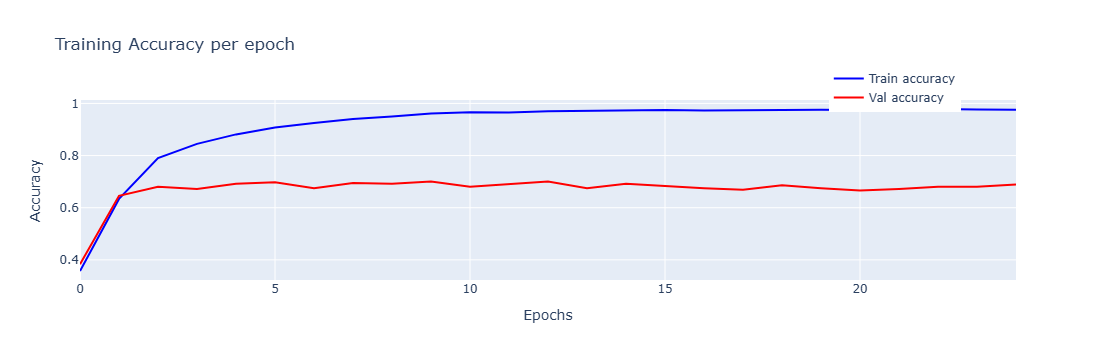

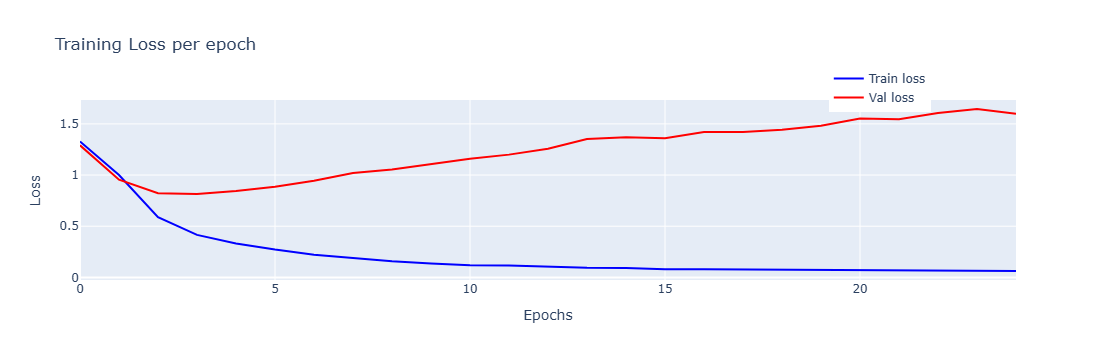

In [25]:
# Answer here
import plotly.graph_objects as go
import pandas as pd

# Load the training log data (‰øÆÊîπÊ™îÊ°àË∑ØÂæëÁÇ∫ÊÇ®ÁöÑCSVÊ™îÊ°à‰ΩçÁΩÆ)
#training_log = pd.read_csv('training_log.csv')

# Âª∫Á´ãË®ìÁ∑¥ÂíåÈ©óË≠âÊ∫ñÁ¢∫ÁéáÂúñË°®
fig_accuracy = go.Figure()
fig_accuracy.add_trace(go.Scatter(x=training_log['epoch'], y=training_log['accuracy'], mode='lines', name='Train accuracy', line=dict(color='blue')))
fig_accuracy.add_trace(go.Scatter(x=training_log['epoch'], y=training_log['val_accuracy'], mode='lines', name='Val accuracy', line=dict(color='red')))
fig_accuracy.update_layout(
    title='Training Accuracy per epoch',
    xaxis_title='Epochs',
    yaxis_title='Accuracy',
    legend=dict(x=0.8, y=1.2)
)
fig_accuracy.show()

# Âª∫Á´ãË®ìÁ∑¥ÂíåÈ©óË≠âÊêçÂ§±ÂúñË°®
fig_loss = go.Figure()
fig_loss.add_trace(go.Scatter(x=training_log['epoch'], y=training_log['loss'], mode='lines', name='Train loss', line=dict(color='blue')))
fig_loss.add_trace(go.Scatter(x=training_log['epoch'], y=training_log['val_loss'], mode='lines', name='Val loss', line=dict(color='red')))
fig_loss.update_layout(
    title='Training Loss per epoch',
    xaxis_title='Epochs',
    yaxis_title='Loss',
    legend=dict(x=0.8, y=1.2)
)
fig_loss.show()


#### Ë™™Êòé

Ê†πÊìö‰∏äÊñπÂúñË°®ÔºåÈÄô‰∫õÊòØË®ìÁ∑¥ÈÅéÁ®ã‰∏≠Ë®ìÁ∑¥ËàáÈ©óË≠âÁöÑÊ∫ñÁ¢∫ÁéáÂíåÊêçÂ§±Êõ≤Á∑öÂúñ„ÄÇÊàëÂÄëÂèØ‰ª•Âæû‰∏≠Ëß£ËÆÄÊ®°ÂûãÁöÑË®ìÁ∑¥ÁãÄÊ≥ÅÔºå‰∏¶ÂàÜÊûêËàáÈÅéÂ∫¶Êì¨ÂêàÊàñÊ¨†Êì¨ÂêàÁöÑÈóú‰øÇÔºö

1. **Ë®ìÁ∑¥ËàáÈ©óË≠âÊ∫ñÁ¢∫ÁéáÔºàAccuracyÔºâ**Ôºö
   - Ë®ìÁ∑¥Ê∫ñÁ¢∫ÁéáÔºàËóçËâ≤ÔºâÂú®ÊåÅÁ∫å‰∏äÂçáÔºå‰∏¶‰∏îÊúÄÁµÇÊé•Ëøë 1.0ÔºåÈÄôË°®ÊòéÊ®°ÂûãÂú®Ë®ìÁ∑¥Êï∏Êìö‰∏äÁöÑË°®ÁèæÈùûÂ∏∏Â•Ω„ÄÇ
   - È©óË≠âÊ∫ñÁ¢∫ÁéáÔºàÁ¥ÖËâ≤ÔºâÂâáÂú®ÂàùÊúü‰∏äÂçá‰πãÂæåÂÅúÊªØ‰∏çÂâçÔºå‰∏¶‰∏îÂú®Êï∏ÂÄã epoch ÂæåÁîöËá≥Áï•ÂæÆ‰∏ãÈôçÔºåÈÄôË°®ÊòéÊ®°ÂûãÂú®È©óË≠âÊï∏Êìö‰∏äÁöÑË°®Áèæ‰∏ç‰Ω≥„ÄÇ
   
2. **Ë®ìÁ∑¥ËàáÈ©óË≠âÊêçÂ§±ÔºàLossÔºâ**Ôºö
   - Ë®ìÁ∑¥ÊêçÂ§±ÔºàËóçËâ≤ÔºâÈö®Ëëó epoch Â¢ûÂä†ËÄåÊåÅÁ∫å‰∏ãÈôçÔºå‰∏¶Ë∂®ËøëÊñº 0ÔºåÈÄôËàáË®ìÁ∑¥Ê∫ñÁ¢∫Áéá‰∏äÂçá‰∏ÄËá¥„ÄÇ
   - È©óË≠âÊêçÂ§±ÔºàÁ¥ÖËâ≤ÔºâÂú®ÂàùÊúü‰∏ãÈôçÂæåÈñãÂßã‰∏äÂçáÔºåÈÄôË°®ÊòéÊ®°ÂûãÂú®È©óË≠âÊï∏Êìö‰∏äÁöÑË™§Â∑ÆÂ¢ûÂä†‰∫Ü„ÄÇ

##### ÈÅéÂ∫¶Êì¨ÂêàÔºàOverfittingÔºâÁöÑË∑°Ë±°
ÈÄôÂÖ©ÂÄãÂúñË°®È°ØÁ§∫Âá∫ÊòéÈ°ØÁöÑÈÅéÂ∫¶Êì¨ÂêàÁèæË±°„ÄÇÈÅéÂ∫¶Êì¨ÂêàÊòØÊåáÊ®°ÂûãÂú®Ë®ìÁ∑¥Êï∏Êìö‰∏äË°®ÁèæÈùûÂ∏∏Â•ΩÔºå‰ΩÜÂú®È©óË≠âÊï∏Êìö‰∏äË°®Áèæ‰∏ç‰Ω≥ÔºåÁÑ°Ê≥ïÂæàÂ•ΩÂú∞Ê≥õÂåñ„ÄÇÂÖ∑È´îËÄåË®ÄÔºö
   - Ë®ìÁ∑¥Ê∫ñÁ¢∫ÁéáÈùûÂ∏∏È´òÔºå‰ΩÜÈ©óË≠âÊ∫ñÁ¢∫ÁéáËºÉ‰Ωé‰∏îÂÅúÊªØ‰∏çÂâç„ÄÇ
   - Ë®ìÁ∑¥ÊêçÂ§±ÈùûÂ∏∏‰ΩéÔºå‰ΩÜÈ©óË≠âÊêçÂ§±ÈÄêÊº∏‰∏äÂçáÔºåÈ°ØÁ§∫Ê®°ÂûãÂú®È©óË≠âÊï∏Êìö‰∏äÈ†êÊ∏¨ÈåØË™§Â¢ûÂä†„ÄÇ

---
### Exercise 7 (Take home):
Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?

Answer: ÂèØ‰ª•Â∞áÂè•Â≠êÁöÑË©ûÂêëÈáèÁµêÂêàÊàê‰∏ÄÂÄãÂè•Â≠êÂêëÈáèÔºå‰ΩøÁî®Â¶ÇRNN, Attention Mechanisms, ÊàñÈ†êË®ìÁ∑¥Ê®°ÂûãÂ¶ÇBERT„ÄÇ

---
### Exercise 8 (Take home): 

In [28]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


C:\Users\ArieL\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



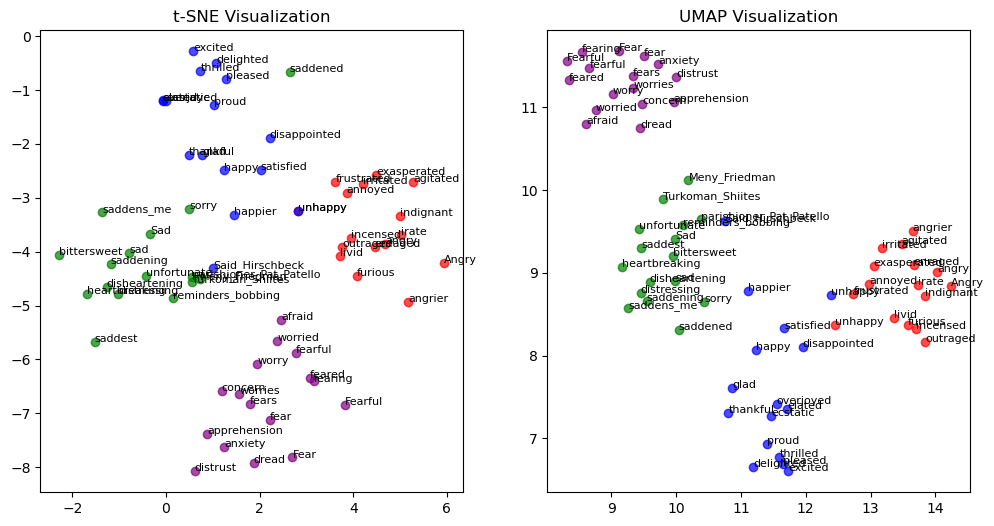

In [29]:
# Answer here
topn = 15  # ÊØèÂÄãÂñÆÂ≠óÊâæÂà∞ 15 ÂÄãÁõ∏ÈóúÂñÆÂ≠ó
target_words = []

for word in ["angry", "happy", "sad", "fear"]:
    similar_words = [word] + [word_ for word_, sim_ in w2v_google_model.most_similar(word, topn=topn)]
    target_words.extend(similar_words)

word_vectors = [w2v_google_model[word] for word in target_words]

import numpy as np
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# È°ûÂà•ÂñÆÂ≠óÂèäÈ°èËâ≤Êò†Â∞Ñ
categories = ["angry", "happy", "sad", "fear"]
colors = ["red", "blue", "green", "purple"]

# ÁîüÊàêÁõ∏‰ººÂñÆÂ≠óÂàóË°®ÂíåÈ°èËâ≤Ê®ôÁ±§
topn = 15
target_words = []
word_colors = []

for category, color in zip(categories, colors):
    similar_words = [category] + [word_ for word_, sim_ in w2v_google_model.most_similar(category, topn=topn)]
    target_words.extend(similar_words)
    word_colors.extend([color] * (topn + 1))  # ÊØèÁµÑÂñÆÂ≠óÂàÜÈÖçÂ∞çÊáâÈ°èËâ≤

# ÂèñÂæóÂñÆÂ≠óÂêëÈáè‰∏¶ËΩâÊèõÁÇ∫ NumPy Èô£Âàó
word_vectors = np.array([w2v_google_model[word] for word in target_words])

# t-SNE ÈôçÁ∂≠
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(word_vectors)

# UMAP ÈôçÁ∂≠
umap_model = umap.UMAP(n_components=2, random_state=0)
umap_results = umap_model.fit_transform(word_vectors)

# Ë¶ñË¶∫ÂåñÁµêÊûú
plt.figure(figsize=(12, 6))

# t-SNE Ë¶ñË¶∫Âåñ
plt.subplot(1, 2, 1)
for i, word in enumerate(target_words):
    plt.scatter(tsne_results[i, 0], tsne_results[i, 1], color=word_colors[i], alpha=0.7)
    plt.annotate(word, (tsne_results[i, 0], tsne_results[i, 1]), fontsize=8)
plt.title("t-SNE Visualization")

# UMAP Ë¶ñË¶∫Âåñ
plt.subplot(1, 2, 2)
for i, word in enumerate(target_words):
    plt.scatter(umap_results[i, 0], umap_results[i, 1], color=word_colors[i], alpha=0.7)
    plt.annotate(word, (umap_results[i, 0], umap_results[i, 1]), fontsize=8)
plt.title("UMAP Visualization")

plt.show()

t-SNEÔºöÈÄöÂ∏∏Âú®Â±ÄÈÉ®ÁµêÊßãÁöÑÂ±ïÁ§∫‰∏äÊúâÊõ¥Â•ΩÁöÑÊïàÊûúÔºåÂ∞çÊñºÈ°û‰ººÁöÑÂñÆÂ≠óÊúÉËÅöÈõÜÂú®‰∏ÄËµ∑ÂΩ¢ÊàêÂ±ÄÈÉ®Áæ§ÈõÜ„ÄÇÈÅ©ÂêàËßÄÂØüË©ûÂΩô‰πãÈñìÁöÑÂæÆÂ∞èÂ∑ÆÁï∞„ÄÇ\
UMAPÔºöÂú®Â±ïÁ§∫ÂÖ®Â±ÄÁµêÊßã‰∏äËºÉ‰Ω≥ÔºåËÉΩ‰øùÁïôÊï¥È´îÊï∏ÊìöÁöÑÂΩ¢ÁãÄÂíåÂàÜ‰Ωà„ÄÇËã•ÂñÆÂ≠ó‰πãÈñìÁöÑË∑ùÈõ¢Âú®ÂéüÈ´òÁ∂≠Á©∫Èñì‰∏≠ÂæàÂ§ßÔºåUMAP ËÉΩÂ§†‰øùÊåÅÈÄô‰∫õÂÖ®ÂüüÁöÑÂ∑ÆÁï∞„ÄÇ

---
### Exercise 9 (Take home):

In [ ]:
import ollama
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'assistant',
        'content': 'What is data mining? (in markdown format)'
    },
])

from IPython.display import display, Markdown, Latex
display(Markdown(response['message']['content']))

**Below is an cached response generated by ollama**

Data Mining
Definition and Explanation
Data mining is the process of discovering patterns, relationships, and insights from large datasets. It involves using various techniques, such as statistical analysis, machine learning algorithms, and data visualization, to uncover hidden knowledge or trends within the data.

Types of Data Mining
There are several types of data mining, including:

Supervised Learning: This type of data mining involves using labeled training data to learn a mapping between input data and output labels.
Unsupervised Learning: In this type of data mining, no labeled training data is available. Instead, the algorithm learns patterns and relationships within the data on its own.
Semi-supervised Learning: This approach combines supervised and unsupervised learning to leverage both labeled and unlabeled data.
Applications of Data Mining
Data mining has numerous applications across various industries, such as:

Marketing: Personalized recommendations, customer segmentation, and sales forecasting.
Finance: Risk analysis, credit scoring, and portfolio optimization.
Healthcare: Patient diagnosis, disease prediction, and treatment planning.
Sports Analytics: Player performance tracking, team strategy optimization, and fan engagement measurement.
Challenges of Data Mining
While data mining offers numerous benefits, it also poses several challenges, such as:

Data Quality Issues: Noisy, missing, or inconsistent data can lead to biased results.
Scalability: Large datasets require significant computational resources and expertise.
Interpretability: Complex models can be difficult to understand and communicate insights effectively.
Best Practices for Data Mining
To ensure successful data mining endeavors, follow these best practices:

Data Preprocessing: Clean, transform, and normalize the data before modeling.
Model Selection: Choose algorithms that align with problem requirements and data characteristics.
Hyperparameter Tuning: Optimize model performance by adjusting hyperparameters.
Model Evaluation: Assess model accuracy, precision, recall, and other relevant metrics.
By understanding the principles of data mining, its applications, challenges, and best practices, organizations can harness the power of data to drive informed decision-making and gain a competitive edge.

---
### Exercise 10 (Take home):
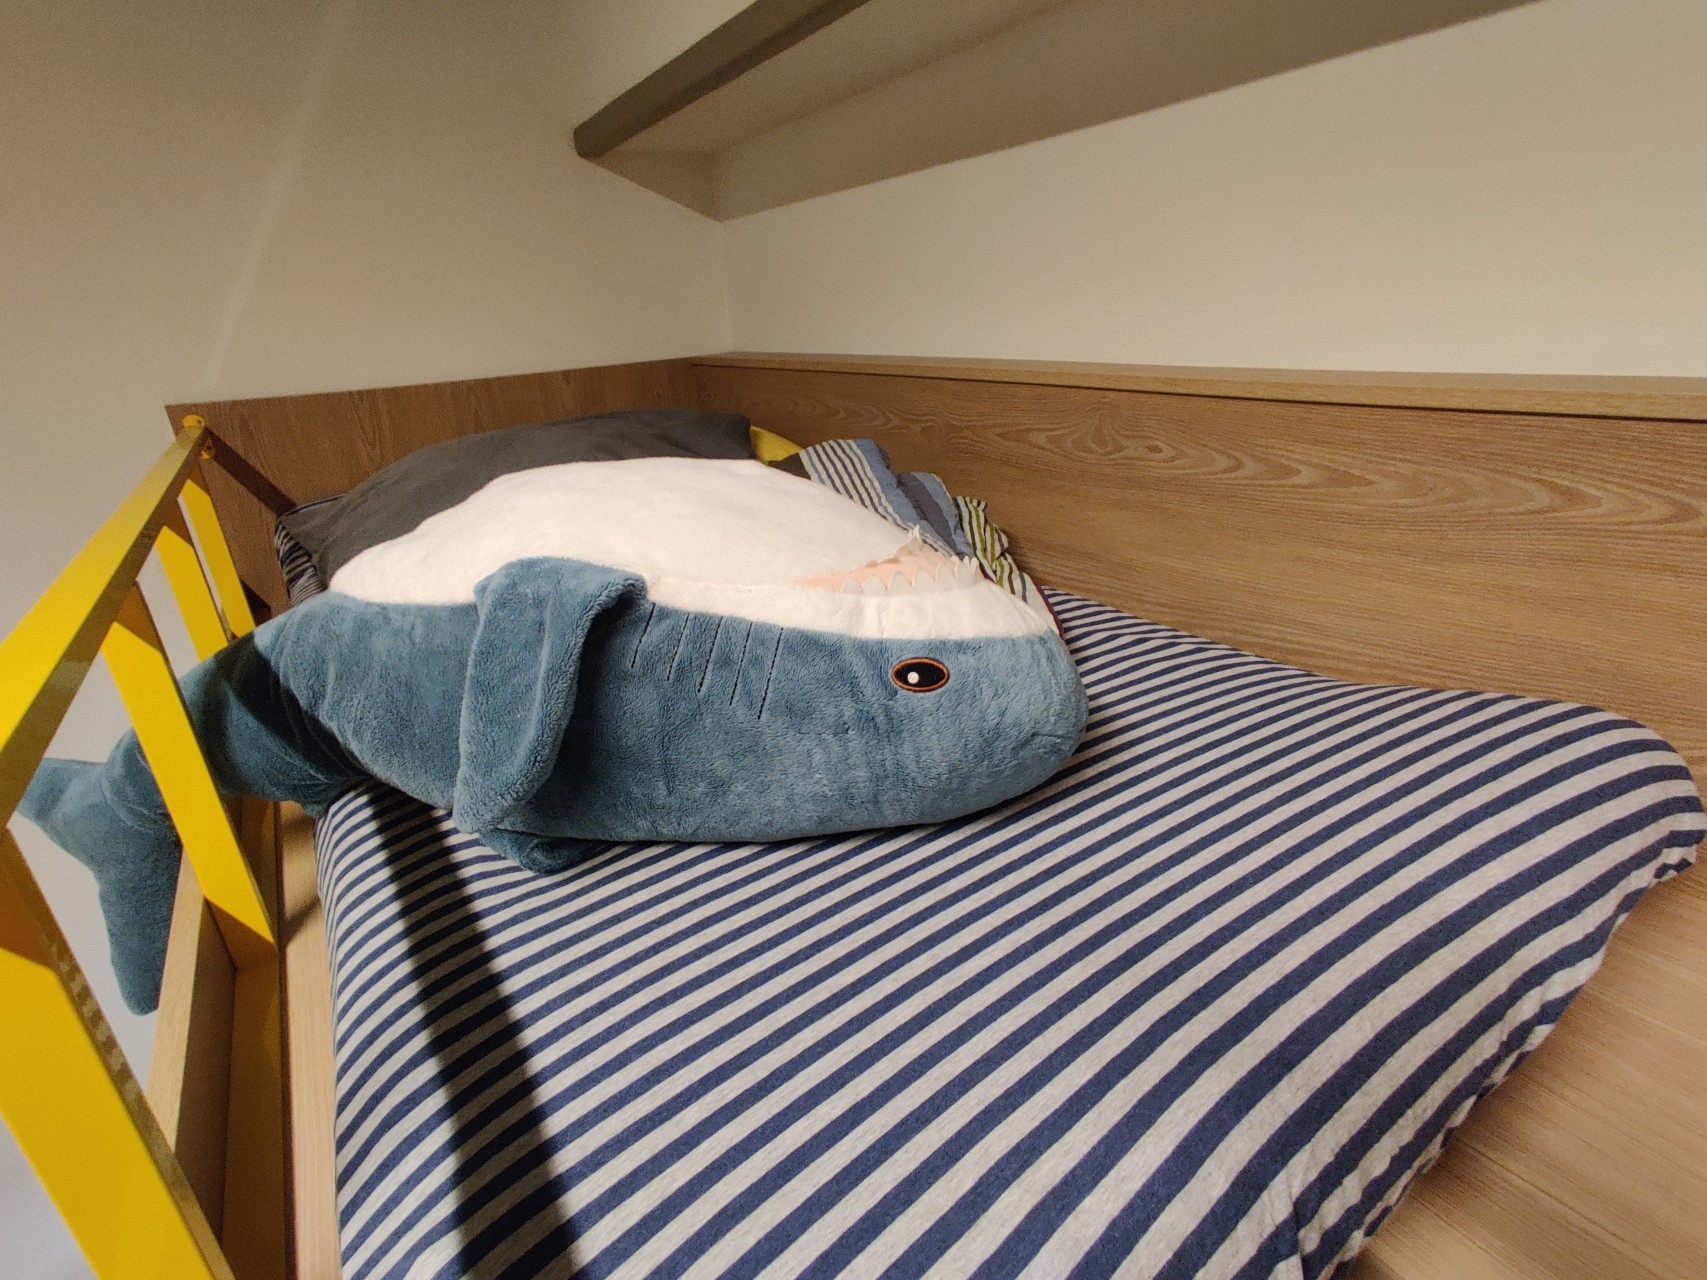

In [ ]:
import ollama
response4 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/IMG_compressed.jpg'] #Image of a bed and a plush pillow
    },
])

display(Markdown(response4['message']['content']))

**Below is an cached response generated by llava**

This image captures a cozy corner of a bedroom, featuring a wooden bunk bed with two levels. The top bunk is adorned with a blue and white striped blanket that has a playful dolphin design on it. A gray stuffed animal, possibly made of fur or plush material, rests at the foot of this bunk bed, adding to the warmth and comfort of the space.

The bottom bunk is covered with a blue and white striped bedspread that matches the blanket above, creating a harmonious color scheme. The wooden floor beneath contrasts nicely with the light-colored walls in the background, completing this inviting scene.

Please note that there are no people or moving objects in this image. It's a snapshot of an unoccupied moment in time, full of potential for rest and relaxation.

#### **ÁµêÊûúÔºö**
llava-phi3Ê≠§Ê¨°Áî¢ÁîüÁöÑÊïòËø∞Â§ßËá¥‰∏äÊçïÊçâ‰∫ÜÂúñÁâáÁöÑÊ∞õÂúçÔºå‰ΩÜÊúâ‰∏Ä‰∫õÂ∞èÂú∞Êñπ‰∏çÂ§™Ê∫ñÁ¢∫„ÄÇÊõ¥Á≤æÁ¢∫ÁöÑÊèèËø∞ÊáâË©≤ÁÇ∫Ôºà‰ª•GPT 4oÁî¢ÁîüÔºâÔºö

ÈÄôÂºµÂúñÁâáÂ±ïÁ§∫‰∫Ü‰∏ÄÂÄãÊ∫´È¶®ÁöÑÂ∫äÈã™Â∏ÉÁΩÆÔºåÂèØËÉΩÊòØ‰∏ä‰∏ãËàñÊàñÈ´òÊû∂Â∫ä„ÄÇÂ∫ä‰∏äÊîæÁΩÆ‰∫Ü‰∏ÄÂÄãÂ§ßÂûãÁöÑÈØäÈ≠öÁµ®ÊØõÁé©ÂÅ∂ÔºàÂèØËÉΩÊòØIKEAÁöÑ‚ÄúBl√•haj‚ÄùÔºâÔºåË∫∫Âú®ËóçÁôΩÊ¢ùÁ¥ãÁöÑÂ∫äÂ¢ä‰∏ä„ÄÇÂ∑¶ÂÅ¥Êúâ‰∏ÄÂÄãÈªÉËâ≤ÁöÑÊ¨ÑÊùÜÔºåÈ°ØÁ§∫ÈÄôÂèØËÉΩÊòØ‰∏ÄÂºµÈ´òÊû∂Â∫äÔºåÊúâ‰øùË≠∑Ê¨ÑÊùÜ„ÄÇÂ∫äÂçÄÊúâÊú®Ë≥™ÁöÑÂ∫äÈ†≠ÊùøÂíåÂÅ¥ÈÇäÔºåÁáüÈÄ†Âá∫Ê∫´ÊöñËÄåÂ∞ÅÈñâÁöÑÁ©∫ÈñìÊÑü„ÄÇÁâÜÂ£ÅÊòØÁ∞°ÂñÆÁöÑÊ∑∫Ëâ≤Ë™øÔºåÂ¢ûÊ∑ª‰∫ÜÊ•µÁ∞°‰∏îËàíÈÅ©ÁöÑÊ∞õÂúç„ÄÇ

ÂúñÁâá‰∏≠Ê≤íÊúâÊµ∑Ë±öÂúñÊ°àÔºåËÄåÊïòËø∞ÊâÄÊèêÂà∞ÁöÑ‚ÄúÁÅ∞Ëâ≤Áé©ÂÅ∂‚ÄùÂÖ∂ÂØ¶ÊòØÈÄôÈöªËóçÁôΩÁõ∏ÈñìÁöÑÈØäÈ≠öÁµ®ÊØõÁé©ÂÅ∂„ÄÇÊèèËø∞‰∏≠‚ÄúÂØßÈùúÁöÑÁû¨Èñì‚Äù‰æùÁÑ∂Ë≤ºÂàáÔºåÂõ†ÁÇ∫Áï´Èù¢‰∏≠Ê≤íÊúâ‰ªª‰Ωï‰∫∫ÊàñÁßªÂãïÁöÑÂÖÉÁ¥†„ÄÇ

---
### Exercise 11 (Take home):

In [ ]:
# Answer here
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from IPython.display import display, Markdown

llm_model = "llama3.2" #You can change to the one of your preference

# Function to load, split, and retrieve documents from a single URL
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict()
    )
    docs = loader.load()
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
    splits = text_splitter.split_documents(docs)
    
    embeddings = OllamaEmbeddings(model=llm_model)
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)
    return vectorstore.as_retriever()

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain for each question
def rag_chain(question, retriever):
    retrieved_docs = retriever.invoke(question)
    formatted_context = "\n\n".join(doc.page_content for doc in retrieved_docs)
    return ollama_llm(question, formatted_context)

# Define URLs and corresponding questions
url_question_pairs = [
    {
        "url": "https://feedback.minecraft.net/hc/en-us/articles/31289611893645-Minecraft-Java-Edition-1-21-3",
        "question": "What Fixed bugs are in this Minecraft release?"
    },
    {
        "url": "https://support.apple.com/en-gb/guide/logicpro/lgcef1edc1d7/mac",
        "question": "List Channel EQ parameters."
    },
    {
        "url": "https://www.alibabacloud.com/en/solutions/generative-ai/qwen?_p_lc=1",
        "question": "What are the abilities of Qwen model?"
    }
]

# Loop through each URL-question pair, create a retriever for each, and display results
for pair in url_question_pairs:
    retriever = load_and_retrieve_docs(pair["url"])  # Load and retrieve docs for the specific URL
    result = rag_chain(pair["question"], retriever)  # Get answer for the specific question
    display(Markdown(f"#### Question: {pair['question']}\n\n**Answer:**\n\n{result}\n\n"))

**Below is an cached response generated by llava**

Question: What Fixed bugs are in this Minecraft release?
Answer:

There are no Minecraft releases mentioned in the text provided. The text appears to be discussing Qwen 2.5 models, which seem to be a type of large language model (LLM) developed for natural language processing tasks.

If you'd like to ask about bug fixes or updates specifically related to Minecraft, I'll do my best to provide information on that front as well!

Question: List Channel EQ parameters.
Answer:

Here are the Channel EQ parameters:

Band
Gain
Center Frequency
Width of the frequency band around the center frequency
Q value (Quality factor)
These parameters can be adjusted for each channel in an audio signal to customize the equalization settings. The exact parameters and their meanings may vary depending on the specific EQ pedal or software being used.

Question: What are the abilities of Qwen model?
Answer:

The abilities of the Qwen 2.5 model include:

Significantly more knowledge acquisition compared to the previous model (MMLU: 85+).
Improved capabilities in coding, with competitive performance against larger language models on coding evaluation benchmarks.
Greatly improved capabilities in mathematics, with a score of MATH 80+.
Enhanced ability to follow instructions.
Improved capability to generate long texts.
Better understanding of structured data.
Ability to generate structured outputs.
Greater resilience to the diversity of system prompts, enhancing role-play implementation and condition-setting for chatbots.
Support for both Chinese and English languages in Qwen2.5-Math.
Incorporation of various reasoning methods in Qwen2.5-Math, including:
Chain-of-Thought (CoT).
Program-of-Thought (PoT).
Tool-Integrated Reasoning (TIR).

#### **ÊØîËºÉ**

**RAG Á≥ªÁµ±ÁöÑÂÑ™Èªû**Ôºö
1. **ÊèêÈ´òÊ∫ñÁ¢∫ÊÄß**ÔºöÈÄöÈÅéÊñá‰ª∂Ê™¢Á¥¢ÔºåÊèê‰æõÊõ¥Ê∫ñÁ¢∫ÁöÑÂõûÁ≠îÔºåÊ∏õÂ∞ëÊ®°Âûã‰æùË≥¥ÈÅéÊôÇÁü•Ë≠ò„ÄÇ
2. **Ê∏õÂ∞ëÂπªË¶∫ÁèæË±°**ÔºöRAG Á≥ªÁµ±ÂèØÂü∫ÊñºÁúüÂØ¶Êñá‰ª∂‰ΩúÁ≠îÔºåÊ∏õÂ∞ëÁîüÊàêÈåØË™§Ë®äÊÅØ„ÄÇ
3. **ÁâπÂÆöÊÉÖÂ¢ÉÂõûÊáâ**ÔºöÈáùÂ∞ç‰∏çÂêåÂïèÈ°åÊ™¢Á¥¢Áõ∏ÈóúÊñá‰ª∂ÔºåÊèê‰æõÊõ¥ÂÖ∑ÈáùÂ∞çÊÄßÁöÑÂõûÁ≠î„ÄÇ
4. **ÂèØÊì¥Â±ïÊÄß**ÔºöRAG Á≥ªÁµ±ÂèØÈÅ©Êáâ‰∏çÂêåÈ†òÂüüÁöÑÈúÄÊ±ÇÔºåÈÅ©Áî®ÊñºÂ§öÊ®£ÂåñÊáâÁî®„ÄÇ
5. **ÈùàÊ¥ªÊÄß**ÔºöÂèØËôïÁêÜÂ§öÊ®£‰∏ªÈ°åÂïèÈ°åÔºå‰∏¶Ê†πÊìöÈúÄÊ±ÇÊèê‰æõÁ≤æÊ∫ñÂõûÊáâ„ÄÇ

**RAG Á≥ªÁµ±ÁöÑÁº∫Èªû**Ôºö
1. **‰æùË≥¥Êñá‰ª∂Ë≥™Èáè**ÔºöÂõûÊáâÊ∫ñÁ¢∫ÊÄß‰æùË≥¥ÊñºÊñá‰ª∂Ë≥™ÈáèÂíåÁõ∏ÈóúÊÄßÔºåÂèØËÉΩÂá∫ÁèæË™§Ëß£„ÄÇ
2. **Â¢ûÂä†Âª∂ÈÅ≤**ÔºöÊ™¢Á¥¢Ê≠•È©üÊúÉÂ¢ûÂä†ËôïÁêÜÊôÇÈñìÔºåÂ∞çÂç≥ÊôÇÂõûÊáâÂèØËÉΩ‰∏çÂà©„ÄÇ
3. **Á≥ªÁµ±Ë®≠Ë®àË§áÈõúÊÄß**ÔºöÈúÄË¶ÅÁÆ°ÁêÜÊ™¢Á¥¢ÂíåÁîüÊàêÁµÑ‰ª∂ÔºåÂ¢ûÂä†Á≥ªÁµ±Ë®≠ÁΩÆÂíåÁ∂≠Ë≠∑Èõ£Â∫¶„ÄÇ
4. **Â∞çÊú™ÁµêÊßãÂåñË≥áË®äÁêÜËß£ÊúâÈôê**ÔºöËã•Êñá‰ª∂Áº∫‰πèÂÆåÊï¥Ë≥áË®äÔºåÁ≥ªÁµ±ÂèØËÉΩÈõ£‰ª•ÁîüÊàêÊúâÁî®ÂõûÁ≠î„ÄÇ
5. **ÂèØËÉΩÂá∫ÁèæÂÜóÈ§òË®äÊÅØ**ÔºöÁï∂Â§öÂÄãÊñá‰ª∂ÊúâÈáçË§áÂÖßÂÆπÊôÇÔºåÂõûÁ≠îÂèØËÉΩÈÅéÊñºÂÜóÈï∑„ÄÇ

---
### Exercise 12 (Take home):

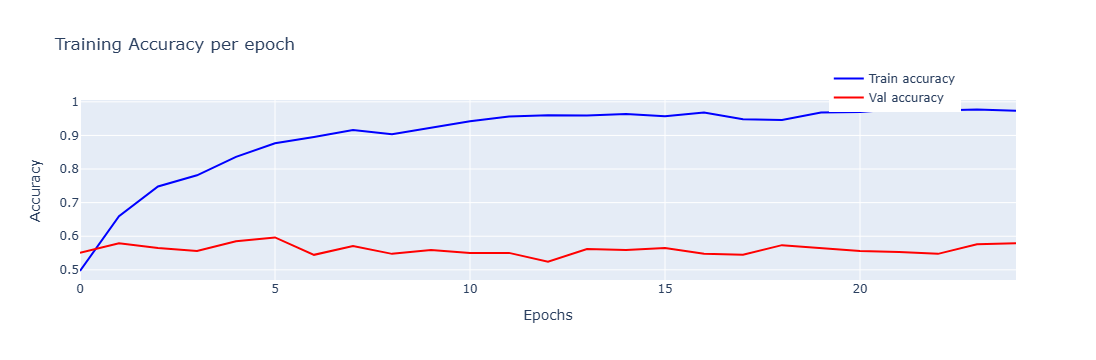

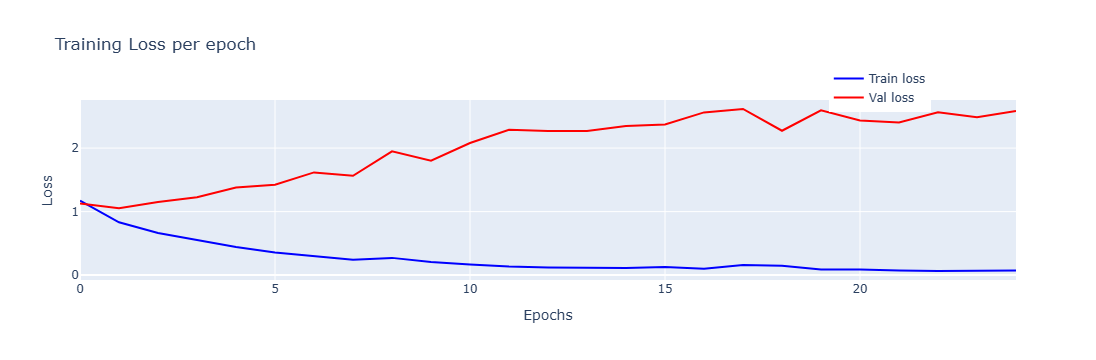

In [32]:
# Answer here

import plotly.graph_objects as go
import pandas as pd

# Load the training log data (‰øÆÊîπÊ™îÊ°àË∑ØÂæëÁÇ∫ÊÇ®ÁöÑCSVÊ™îÊ°à‰ΩçÁΩÆ)
training_log = pd.read_csv('logs/training_log_2.csv')

# Âª∫Á´ãË®ìÁ∑¥ÂíåÈ©óË≠âÊ∫ñÁ¢∫ÁéáÂúñË°®
fig_accuracy = go.Figure()
fig_accuracy.add_trace(go.Scatter(x=training_log['epoch'], y=training_log['accuracy'], mode='lines', name='Train accuracy', line=dict(color='blue')))
fig_accuracy.add_trace(go.Scatter(x=training_log['epoch'], y=training_log['val_accuracy'], mode='lines', name='Val accuracy', line=dict(color='red')))
fig_accuracy.update_layout(
    title='Training Accuracy per epoch',
    xaxis_title='Epochs',
    yaxis_title='Accuracy',
    legend=dict(x=0.8, y=1.2)
)
fig_accuracy.show()

# Âª∫Á´ãË®ìÁ∑¥ÂíåÈ©óË≠âÊêçÂ§±ÂúñË°®
fig_loss = go.Figure()
fig_loss.add_trace(go.Scatter(x=training_log['epoch'], y=training_log['loss'], mode='lines', name='Train loss', line=dict(color='blue')))
fig_loss.add_trace(go.Scatter(x=training_log['epoch'], y=training_log['val_loss'], mode='lines', name='Val loss', line=dict(color='red')))
fig_loss.update_layout(
    title='Training Loss per epoch',
    xaxis_title='Epochs',
    yaxis_title='Loss',
    legend=dict(x=0.8, y=1.2)
)
fig_loss.show()


#### KNN ËàáÁ•ûÁ∂ìÁ∂≤Ë∑Ø (NN) ÊØîËºÉÁµêÊûú

1. **ÊÅêÊáºÂàÜÈ°û**ÔºöÂÖ©ËÄÖÈÉΩËÉΩÊ∫ñÁ¢∫ÂàÜÈ°û„ÄåÊÅêÊáº„ÄçÔºå‰ΩÜ NN Ë°®ÁèæÊõ¥‰Ω≥ÔºåÈÄôÊòØÂõ†ÁÇ∫ NN ÁöÑÈùûÁ∑öÊÄßÊû∂ÊßãÊõ¥ËÉΩÊçïÊçâ LLM ÁâπÂæµ‰∏≠ÁöÑÁ¥∞ÂæÆÂ∑ÆÁï∞„ÄÇ

2. **ÂñúÊÇÖËàáÊÇ≤ÂÇ∑ÂàÜÈ°û**ÔºöKNN Âú®„ÄåÂñúÊÇÖ„ÄçÂíå„ÄåÊÇ≤ÂÇ∑„ÄçÁöÑÊ∫ñÁ¢∫Â∫¶ËºÉ‰ΩéÔºåNN ÂâáÊõ¥ÂÖ∑ÂÑ™Âã¢„ÄÇÈÄôË°®Êòé LLM ÁâπÂæµ‰∏≠„ÄåÂñúÊÇÖ„ÄçÂíå„ÄåÊÇ≤ÂÇ∑„Äç‰πãÈñìÁöÑÂàÜÁïå‰∏çÊòéÁ¢∫ÔºåNN ËºÉËÉΩË≠òÂà•Âá∫Èö±Âê´ÁöÑË§áÈõúÊ®°Âºè„ÄÇ

3. **ÊÜ§ÊÄíÈåØË™§ÂàÜÈ°û**ÔºöÂÖ©ËÄÖÂú®„ÄåÊÜ§ÊÄí„ÄçÁöÑÂàÜÈ°û‰∏äÈÉΩÊúâÂõ∞Èõ£Ôºå‰ΩÜ NN Áï•ÂÑ™Êñº KNNÔºåÂèØËÉΩÊòØÂõ†ÁÇ∫„ÄåÊÜ§ÊÄí„ÄçËàáÂÖ∂‰ªñÊÉÖÁ∑íÁâπÂæµÊúâÈáçÁñäÔºåNN ÂèØ‰ª•ÊçïÊçâÊõ¥Â§öÁ¥∞ÁØÄ„ÄÇ

4. **ËàáÂÖ∂‰ªñÊ®°ÂûãÊØîËºÉ**ÔºöÁõ∏ÊØîÊñºÂÇ≥Áµ±Ê®°ÂûãÔºåLLM ÁâπÂæµËàá NN Êõ¥Â•ëÂêàÔºåÂõ†ÁÇ∫ NN ËÉΩÊçïÊçâÂà∞È´òÁ∂≠ÁâπÂæµ‰∏≠ÁöÑË™ûÊÑèÈóú‰øÇÔºåKNN ÂâáÂõ†Á∞°ÂñÆÁöÑË∑ùÈõ¢Â∫¶ÈáèËÄåÂèóÈôê„ÄÇ

Á∏ΩÁµê‰æÜË™™ÔºåNN Êõ¥ÈÅ©ÂêàËôïÁêÜ LLM ÂµåÂÖ•ÁâπÂæµÔºåËÉΩÊõ¥ÊúâÊïàÂú∞ÂàÜÈ°ûÊÉÖÁ∑í„ÄÇ

---
### Exercise 13 (Take home):

#### ÊØîËºÉËàáË®éË´ñ
- **0-shot ÂàÜÈ°û**ÔºöÊ®°ÂûãÂú®Ê≤íÊúâÁ§∫‰æãÁöÑÊÉÖÊ≥Å‰∏ãË°®Áèæ‰∏ç‰Ω≥ÔºåÂ∞§ÂÖ∂ÊòØÂú®„Äåfear„ÄçÁöÑÈ†êÊ∏¨‰∏äÈåØË™§ËºÉÂ§ö„ÄÇ
- **1-shot ÂàÜÈ°û**ÔºöÂ¢ûÂä†‰∏ÄÂÄãÁ§∫‰æãÂæåÔºåÈÉ®ÂàÜÈ°ûÂà•ÁöÑÊ∫ñÁ¢∫Â∫¶ÊúâÊâÄÊèêÂçáÔºåÂ∞§ÂÖ∂Âú®„Äåanger„ÄçÂíå„Äåjoy„ÄçÈ°ûÂà•„ÄÇ
- **5-shot ÂàÜÈ°û**ÔºöÈö®ËëóÁ§∫‰æãÊï∏ÈáèÂ¢ûÂä†Ëá≥‰∫îÂÄãÔºåÊ®°ÂûãÁöÑÊ∫ñÁ¢∫Â∫¶È°ØËëóÊèêÂçáÔºåÁâπÂà•ÊòØÂú®„Äåanger„ÄçÂíå„Äåfear„ÄçÈ°ûÂà•‰∏äË°®ÁèæÊõ¥Â•Ω„ÄÇ